# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem ), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

df = pd.read_csv('data/human_body_temperature.csv')

In [64]:
df.shape

(130, 3)

In [65]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [67]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


# **1. Is the distribution of body temperatures normal?**

First let's have a look at the empirical distribution of the data (should be bell-shaped) 

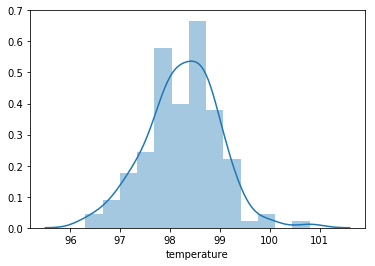

In [68]:
sns.distplot(df.temperature);

It has a bell shape
But, let's check the results of other ways.

In [69]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1,len(data)+1)/n
    
    return x,y    

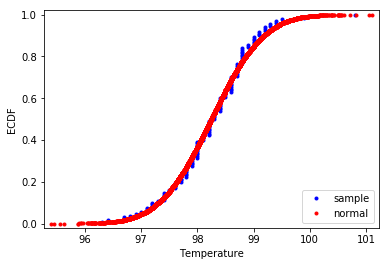

In [70]:
x,y=ecdf(df.temperature)
plt.plot(x,y,marker='.',linestyle='none',color='blue')

np.random.seed(42)
mu = np.mean(df.temperature)
sigma = np.std(df.temperature)
samples = np.random.normal(mu, sigma, size=10000)
x_theor,y_theor = ecdf(samples)
plt.plot(x_theor,y_theor,marker='.',linestyle='none',color='red')

plt.margins(0.02)
plt.xlabel('Temperature')
plt.ylabel('ECDF')
plt.legend(['sample','normal'],loc='lower right')

plt.show();

When we check the ECDF plots, we can see that the simulated sample created by the mean of the sample mean and the sample data almost overlap.

Let's make a null hypothesis now:

H0 = Temperature data come from the normal distribution(p=0.05)

Scipy has an excellent library named stats. 

Now let's use some tools of stats.

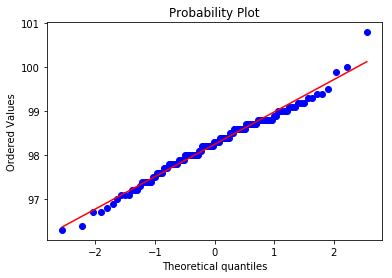

In [71]:
stats.probplot(df.temperature, dist="norm", plot=plt)
plt.show()

This is the probability plot of sample data against the quantiles of normal distribution.
The red line is the best-fit line for the data and the results plotted with Matplotlib are generally overlapping with it.

In [72]:
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

This is the best!
Testing the null hypothesis that a sample comes from a normal distribution. It is based on D’Agostino and Pearson’s test that combines skew and kurtosis to produce an omnibus test of normality.
Statistic value is coming form s^2 + k^2, where s is the z-score returned by skewtest and k is the z-score returned by kurtosistest. And the p-value is a 2-sided chi squared probability for the hypothesis test.

In [73]:
print(stats.kurtosistest(df.temperature));
print(stats.skewtest(df.temperature))

KurtosistestResult(statistic=1.644185128084768, pvalue=0.10013796794683075)
SkewtestResult(statistic=-0.021370491432771, pvalue=0.9829501126135382)


We cannot reject the nul hypotesis since our **p-value is greater than .05**. We can assume the **data to be normally distributed.**


# 2
# Is the sample size large? Are the observations independent?

Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.


In [74]:
len(df.temperature)

130

Our sample size is greater than the sample size required for Central Limit Theorem (30). We can assume that the measurements are independent because they're collected from diffrent people, we can say that the sample mean will be approximately a normal distribution.

# 3
Is the true population mean really 98.6 degrees F? The true mean temperature of human in the experiment was actually 98.6???

a. First, try a bootstrap hypothesis test.

b. Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?

c. In this situation, is it appropriate to use the t or z statistic?

d. Now try using the other test. How is the result be different? Why?


In [75]:

# H0 X = Mu (98.6)
# HA X = Mu is not 98.6

bs_replicates = np.empty(10000)

for i in range(10000):
  # Generate bootstrap sample
  bs_sample = np.random.choice(df.temperature, size=len(df.temperature))
  # Compute replicate
  bs_replicates[i] = np.mean(bs_sample)

# get p-value
p = np.sum(bs_replicates >= 98.6) / len(bs_replicates)
print('p-val =', p)

p-val = 0.0


a. pvalue is 0 which is lower than .05 we can reject the H0 in favor of the HA that the poulation mean differs from 98.6 F. Based on the 95% confidence interval, temperatures between 98.12 and 98.37 are considered normal.

b. One-sample test should be used here because we only have temperature data, we dont have any second data set.

c. Data is normally distributed and we don't have the standard deviation value. We have to use the t statistic.

The t test compares two means and tells you if they are different from each other. The t test also tells you how significant the differences are; In other words it lets you know if those differences could have happened by chance.

In [76]:
std_err = df.temperature.std() / np.sqrt(len(df.temperature))

t_value = (df.temperature.mean() - 98.6) / std_err

deg_freedom = len(df.temperature.values) - 1

stats.t.sf(np.abs(t_value),deg_freedom)*2

2.4106320415609943e-07

p-value is smaller than .05. So we can reject the null hypothesis. So the population mean is not 98.6. 

In [77]:
stats.ttest_1samp(df.temperature.values, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

This is the same value again. Thanks to stats :)

# 4
Draw a small sample of size 10 from the data and repeat both frequentist tests.

-Which one is the correct one to use?

-What do you notice? What does this tell you about the difference in application of the t and z statistic?

In [78]:
#generate random sample
sample =np.random.choice(df.temperature.values, 10)

#t test
stats.ttest_1samp(sample, 98.6)

Ttest_1sampResult(statistic=-1.3605380662763995, pvalue=0.20675496612082248)

In [79]:
#z test
z_value_sample = (np.mean(sample)-98.6)/ np.std(sample) / np.sqrt(len(sample))
2*stats.norm.cdf(z_value_sample)

0.8859637761741921

For both tests, p-values are greater than .05 so that we can accept the null hypothesis.

**Each time once we run the code, we get different t and z statistics since the sample size is too small to evaluate**. Therefore **z and t statistics are not reliable** at this point.

# 5
At what temperature should we consider someone's temperature to be "abnormal"?

-As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.

-Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [80]:
# bootstrap approach

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))   

## Create a function to draw the boot-strap samples
def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
            bs_replicates[i] = bootstrap_replicate_1d(data, func)            
    return bs_replicates
temp_np_array = np.array(df.temperature)
bs_replicates = draw_bs_reps(temp_np_array, np.mean, 10000)

# Compute the confidence interval
conf_int = np.percentile(bs_replicates,[2.5, 97.5])

# Print the confidence interval
print('95 % confidence interval = ', conf_int)

95 % confidence interval =  [98.12151923 98.37076923]


In [88]:
#frequentist approach

translated_temp = temp_np_array - np.mean(temp_np_array) + 98.6

# Take bootstrap replicates of body temperatures: temp_replicates
temp_replicates = draw_bs_reps(translated_temp, np.mean, 10000)
conf_int = np.percentile(temp_replicates, [2.5, 97.5])
# Print the confidence interval
print('95 % confidence interval = {}'.format(conf_int))


95 % confidence interval = [98.47461538 98.72384615]


In [82]:
stats.t.interval(.95,len(df.temperature)-1,Mu,sampleError)

(98.12200290560804, 98.37645863285351)

Abnormal temperatures would be below 98.12 and above 98.37

# 6
Is there a significant difference between males and females in normal temperature?

-What testing approach did you use and why?

-Write a story with your conclusion in the context of the original problem.

In [83]:
tempMale = df[df.gender == 'M'].temperature
tempFemale = df[df.gender == 'F'].temperature

print('Mean of the male body temperature : ', tempMale.mean())
print('Mean of the male body temperature : ', tempFemale.mean())

Mean of the male body temperature :  98.1046153846154
Mean of the male body temperature :  98.39384615384613


Population standart deviation is not known, so we'll use t test
And we'll use **two Sample T-Test** because we have 2 different quantities. 

In [90]:
stats.ttest_ind(tempMale,tempFemale)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.02393188312239561)

The null hypothesis - that there is no difference between male and female temperatures - can be rejected

**Bootstrap Test**

In [85]:
diff_of_temps = tempMale.mean() - tempFemale.mean()

#print(np.concatenate((tempMale,tempFemale)))

def draw_bs_reps_2(data1, data2, size):
    
    bs_reps = np.empty(size)
    concat_temp = np.concatenate((data1,data2))
    for i in range(size):
        tempStaff = np.random.permutation(concat_temp)
        bs_x,bs_y = tempStaff[len(data1):],tempStaff[:len(data1)]
        bs_reps[i] = np.mean(bs_x) - np.mean(bs_y)
    
    return bs_reps

bs_replicates = draw_bs_reps_2(tempMale, tempFemale, 10000)

p = np.sum(bs_replicates <= diff_of_temps) / len(bs_replicates)
print('p-value :'+str(p))

p-value :0.0105


H0 -> both Mu's are the same.

Alpha level is .05, it will drop to .025 because it is a 2 side testing.

So Looking at the p, I could say that we can reject the null Hypothesis since p-value (.0105) is lower than level of Alpha.

Cohens D

In [86]:
def cohen_d(x,y):
    nx,ny = len(x),len(y)
    stdx,stdy = np.std(x),np.std(y)
    dof = nx + ny - 2
    return (np.mean(x) - np.mean(y)) / np.sqrt(((nx-1)*np.std(x, ddof=1) ** 2 + (ny-1)*np.std(y, ddof=1) ** 2) / dof)

cohen_d(tempMale,tempFemale)

-0.4008917378598221

Small effect = 0.2 Medium Effect = 0.5 Large Effect = 0.8

So I could say that this had medium effect.